In [44]:
# Necessary libraries

import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
import torch
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms

In [39]:
# Load data

train_file_path = './data/train.p'
valid_file_path = './data/valid.p'
test_file_path = './data/test.p'

with open(train_file_path, mode='rb') as f1:
    train_dict = pickle.load(f1)
with open(valid_file_path, mode='rb') as f2:
    valid_dict = pickle.load(f2)
with open(test_file_path, mode='rb')as f3:
    test_dict = pickle.load(f3)

In [40]:
# Get features and labels (as numpy arrays from th dictionaries)

x_train_np,y_train_np = train_dict['features'],train_dict['labels']
x_valid_np,y_valid_np = valid_dict['features'],valid_dict['labels']
x_test_np,y_test_np = test_dict['features'],test_dict['labels']

print('Train Shape:',x_train_np.shape)
print('Valid Shape:',x_valid_np.shape)
print('Test Shape:',x_test_np.shape)

num_classes = len(set(y_train_np))
print('Number of classes:',num_classes)

Train Shape: (34799, 32, 32, 3)
Valid Shape: (4410, 32, 32, 3)
Test Shape: (12630, 32, 32, 3)
Number of classes: 43


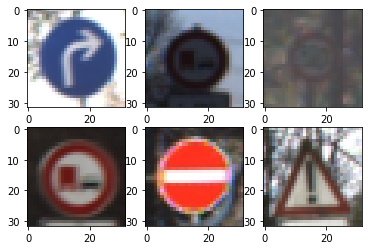

In [41]:
# Visualise few images

rows = 2
cols = 3
fig = plt.figure()

for pos in range(1,rows*cols+1):
    idx = random.randint(1,len(x_train_np))
    img = x_train_np[idx]
    fig.add_subplot(rows,cols,pos)
    plt.imshow(img)
plt.show()

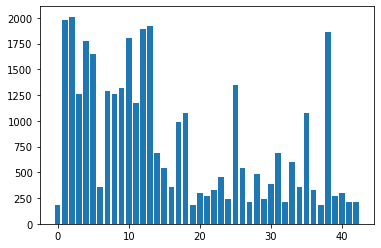

In [42]:
# Class wise training data count

plt.bar(range(num_classes),np.bincount(y_train_np))
plt.show()

In [46]:
# Image Transforms

train_transforms = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])
valid_transforms = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])
test_transforms = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])

In [48]:
# Create Tensor Dataset

class CreateDataset(Dataset):
    def __init__(self,x,y,transforms=None):
        self.x = x
        self.y = y
        self.transforms = transforms
    def __getitem__(self,idx):
        x_batch = self.x[idx]
        y_batch = self.y[idx]
        if self.transforms:
            x_batch = self.transforms(x_batch)
        return x_batch,y_batch
    def __len__(self):
        return len(self.x)
    

train_dataset = CreateDataset(x_train_np,y_train_np,train_transforms)
valid_dataset = CreateDataset(x_valid_np,y_valid_np,valid_transforms)
test_dataset = CreateDataset(x_test_np,y_test_np,test_transforms)

In [49]:
# Create Dataloaders

train_valid_bs = 100
test_bs = 100

train_dataloader = DataLoader(train_dataset,batch_size=train_valid_bs,shuffle=True)
valid_dataloader = DataLoader(valid_dataset,batch_size=train_valid_bs)
test_dataloader = DataLoader(test_dataset,batch_size=test_bs)